<a href="https://colab.research.google.com/github/TheClassicTechno/trashdetectorapp/blob/main/Final_DebriDetec_CNN_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DebriDetec CNN Model

achieved >95% accuracy consistently on the Taco Custom Dataset.

##mount drive to access dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##import necessary libraries

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import pathlib
import cv2
import glob




##accessing paths of all 4 debris types + split entire Taco Dataset into train and validation 80-20 split

In [4]:
#processing images
bottles1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/bottles'
cans1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/cans'
containers1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/containers'
#paper1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/paper'
plastic1 = '/content/drive/MyDrive/TEAM9SURESTART/taco/plastic'

bottles = [cv2.imread(image) for image in glob.glob(bottles1)]
cans = [cv2.imread(image) for image in glob.glob(cans1)]
containers = [cv2.imread(image) for image in glob.glob(containers1)]
#paper = [cv2.imread(image) for image in glob.glob(paper1)]
plastic = [cv2.imread(image) for image in glob.glob(plastic1)]

train_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/TEAM9SURESTART/taco',
    validation_split = 0.2,
    subset = "training",
    seed = 24,  
    image_size = (256, 256),
    batch_size = 8
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/TEAM9SURESTART/taco',
    validation_split = 0.2,
    subset = "validation",
    seed = 24,  
    image_size = (256, 256),
    batch_size = 8
)





train_dataset = train_dataset.cache().shuffle(13).prefetch(buffer_size = tf.data.AUTOTUNE)
val_dataset = val_dataset.cache().shuffle(13).prefetch(buffer_size = tf.data.AUTOTUNE)


Found 230 files belonging to 4 classes.
Using 184 files for training.
Found 230 files belonging to 4 classes.
Using 46 files for validation.


##model architecture

###includes rescaling of input image shapes

In [5]:

model = Sequential ([
    
    
    layers.Rescaling(1./255, input_shape = (256, 256, 3)),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(32, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Conv2D(16, 3, padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.3),
    layers.Flatten(),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(4, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 128, 128, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                    

##train model with 150 epochs

In [6]:
model.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True), metrics = ['accuracy'])
'''
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy'],  run_eagerly=True
)

'''
model.fit (
    train_dataset, 
    validation_data = val_dataset,
    epochs = 150
)


Epoch 1/150


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


23/23 [==============================] - 23s 117ms/step - loss: 1.8420 - accuracy: 0.2120 - val_loss: 1.3498 - val_accuracy: 0.4565
Epoch 2/150
23/23 [==============================] - 0s 17ms/step - loss: 1.2934 - accuracy: 0.4620 - val_loss: 1.2987 - val_accuracy: 0.4565
Epoch 3/150
23/23 [==============================] - 0s 13ms/step - loss: 1.2693 - accuracy: 0.4620 - val_loss: 1.3029 - val_accuracy: 0.4565
Epoch 4/150
23/23 [==============================] - 0s 13ms/step - loss: 1.2727 - accuracy: 0.4620 - val_loss: 1.3156 - val_accuracy: 0.4565
Epoch 5/150
23/23 [==============================] - 0s 13ms/step - loss: 1.2472 - accuracy: 0.4620 - val_loss: 1.2735 - val_accuracy: 0.4565
Epoch 6/150
23/23 [==============================] - 0s 13ms/step - loss: 1.2743 - accuracy: 0.4620 - val_loss: 1.3723 - val_accuracy: 0.4565
Epoch 7/150
23/23 [==============================] - 0s 13ms/step - loss: 1.2598 - accuracy: 0.4620 - val_loss: 1.2913 - val_accuracy: 0.4565
Epoch 8/150
23/2

##visualize train and validation loss and accuracy curves

Text(0.5, 1.0, 'Training-Validation Accuracy')

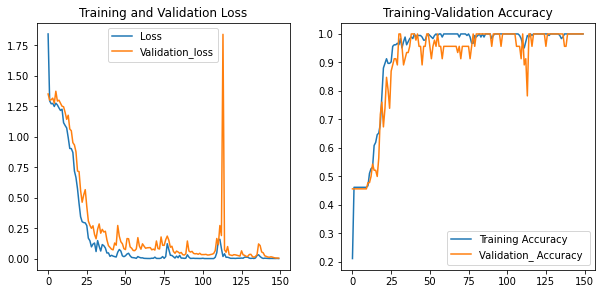

In [7]:
loss = pd.DataFrame(model.history.history)

#plotting the loss and accuracy 
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.plot(loss["loss"], label ="Loss")
plt.plot(loss["val_loss"], label = "Validation_loss")
plt.legend()
plt.title("Training and Validation Loss")

plt.subplot(2,2,2)
plt.plot(loss['accuracy'],label = "Training Accuracy")
plt.plot(loss['val_accuracy'], label ="Validation_ Accuracy ")
plt.legend()
plt.title("Training-Validation Accuracy")

#save model as .h5 model for convenient web app deployment 

In [8]:
model.save('debridetec_model.h5')

'''
#save to drive as h5 model tensorflow model
model_to_be_saved="debridetec_model" 

model.save('/content/drive/MyDrive/saved_models/'+model_to_be_saved+'.h5')
'''

'\n#save to drive as h5 model tensorflow model\nmodel_to_be_saved="debridetec_model" \n\nmodel.save(\'/content/drive/MyDrive/saved_models/\'+model_to_be_saved+\'.h5\')\n'

#web app

In [9]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
!pip install st-btn-select

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 25.2 MB/s 
  Attempting uninstall: google-auth-httplib2
    Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Attempting uninstall: google-auth-oauthlib
    Found existing installation: google-auth-oauthlib 0.4.6
    Uninstalling google-auth-oauthlib-0.4.6:
      Successfully uninstalled google-auth-oauthlib-0.4.6
  Attempting uninstall: google-api-python-client
    Found existing installation: google-api-python-client 1.12.11
    Uninstalling google-api-python-client-1.12.11:
      Successfully uninstalled google-api-python-client-1.12.11
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.9.1 req

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 503 kB 24.8 MB/s 
     |████████████████████████████████| 9.2 MB 63.9 MB/s 
     |████████████████████████████████| 182 kB 66.6 MB/s 
     |████████████████████████████████| 164 kB 50.9 MB/s 
     |████████████████████████████████| 237 kB 71.8 MB/s 
     |████████████████████████████████| 78 kB 6.6 MB/s 
     |████████████████████████████████| 4.7 MB 49.9 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 51 kB 6.5 MB/s 
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19582 sha256=7040fd5fe53660af922fbd18aa71c2ce982fa6a531af20f1ec896ae49d632473
  Stored in directory: /root/.cache/pip/wheels/5f/55/ab/36a76989f7f88d9ca7b1f68da6d94252bb6a8d6ad4f18e04e9
Successfully built validators


In [12]:

%%writefile app.py
from datetime import datetime
import keras
from keras.models import load_model
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import streamlit as st
import numpy as np
import glob
import pandas as pd
import tensorflow as tf
from PIL import Image, ImageOps

from datetime import date
from st_btn_select import st_btn_select

selection = st_btn_select(('CHECK YOUR PLANTS', 'PLANT DISEASES INFO', 'ABOUT OUR APP', 'CONTACT US'))



    

if selection == 'CHECK YOUR PLANTS':
  
    import base64
    def add_bg_from_local(image_file):
        with open(image_file, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read())
        st.markdown(
        f"""
        <style>
        .stApp {{
            background-image: url(data:image/{"PNG"};base64,{encoded_string.decode()});
            background-size: cover
        }}
        </style>
        """,
        unsafe_allow_html=True
        )
    add_bg_from_local('plantbackground.jpg')    
      

                              
    st.markdown(""" <style> .font {
    font-size:50px ; font-weight: 800; color: #2e0a06; background-color: #ff958a;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font"> PlantDoc</p>', unsafe_allow_html=True)
    
    st.markdown(""" <style> .font2 {
    font-size:20px; color: ##0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font2">Created by Julia & Justin Huang</p>', unsafe_allow_html=True)
    
    
      
    

    st.markdown(""" <style> .font3 {
    font-size:35px ; font-weight: 600; color: #ff958a; background-color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font3">Detect if your plants have a disease or not via AI technology: receive a quick & convenient result within seconds!</p>', unsafe_allow_html=True)

    st.markdown(""" <style> .font5 {
    font-size:25px ; font-weight: 600; color: #2e0a06; background-color: #fcf6f5;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font5">Upload Plant Image Here</p>', unsafe_allow_html=True)
    
    image = st.file_uploader(label = " ", type = ['png','jfif', 'jpg', 'jpeg', 'tif', 'tiff', 'raw', 'webp'])

    def import_and_predict(image_data, model):
        size = (227, 227)
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        img = tf.keras.utils.img_to_array(image)
        img = tf.expand_dims(img, 0)
        probs = model.predict(img)
        score = tf.nn.softmax(probs[0])
        text = ("Shoethentic predicts that this is an image of a **{} shoe with {:.2f}% confidence**."
        .format(class_names[np.argmax(score)], 100 * np.max(score)))
        return text

    
  

    loaded_model = tf.keras.models.load_model('model.h5')
    class_names = [
    'bottles',
    'cans',
    'containers',
    'plastic']


    predictionText = "Prediction: Waiting for an image upload"

    if image is not None:
        st.image(image)
        predictionText = (import_and_predict(Image.open(image), loaded_model))

    st.markdown(predictionText)   
    #st.markdown('<p class="font2">predictionText</p>', unsafe_allow_html=True)
    
if selection == 'ABOUT OUR APP':
    import base64
    def add_bg_from_local(image_file):
        with open(image_file, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read())
        st.markdown(
        f"""
        <style>
        .stApp {{
            background-image: url(data:image/{"PNG"};base64,{encoded_string.decode()});
            background-size: cover
        }}
        </style>
        """,
        unsafe_allow_html=True
        )
    add_bg_from_local('plantbackground.jpg')    
    
    st.markdown(""" <style> .font {
    font-size:50px ; font-weight: 800; color: #7792E3; background-color: #fffafa;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font">About PlantDoc</p>', unsafe_allow_html=True)
   

    st.markdown(""" <style> .font2 {
    font-size:30px ; font-weight: 600; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font2">About the Creators</p>', unsafe_allow_html=True)

    st.markdown(""" <style> .font3 {
    font-size:20px ; color: #fffafa;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font3">The web app and model are built by Julia and Justin Huang, high school coders.</p>', unsafe_allow_html=True)
  
    
    
    st.markdown(""" <style> .font2 {
    font-size:30px ; font-weight: 600; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font2">Mission</p>', unsafe_allow_html=True)

    st.markdown(""" <style> .font3 {
    font-size:20px ;  color: #fffafa;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font3">Due to the high usage of pesticides, many plant diseases have become resilient and more common. In addition, farmers, especially those living in isolated or rural parts of the world, may not know what or if a disease has affected their plant. Therefore it is essential to figure out what diseases are affecting plants so consumers do not get sick. So the goal of **Shoethentic** is to provide the farmers and gardeners an opportunity to check the conditions of each and every plant they tend to. **Shoethentic** aims to make this checking process simpler and more convenient by utilizing AI & machine learning.</p>', unsafe_allow_html=True)
    
    st.markdown(""" <style> .font2 {
    font-size:30px ; font-weight: 600; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font2">How PlantDoc was Built</p>', unsafe_allow_html=True)

    st.markdown(""" <style> .font3 {
    font-size:20px ; color: #fffafa;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font3">PlantDoc has two parts: the AI model and web app. The AI model is built using the TensorFlow framework in the Python Language while the web app is built using Streamlit using HTMl/CSS formatting. We trained the model in Google Colab on a dataset consisting of 15 types of plant conditions sourced from the PlantVillage dataset on Kaggle and deployed the model into the web app with Streamlit.</p>', unsafe_allow_html=True)
    
    st.markdown(""" <style> .font2 {
    font-size:30px ; font-weight: 600; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font2">Future of PlantDoc</p>', unsafe_allow_html=True)

    st.markdown(""" <style> .font3 {
    font-size:20px ; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font3">The accuracy of our CNN model is currently 92%, but we plan to improve the accuracy of the AI model even more. We also plan to partner with agricultural businesses so we can test out the app with farmers.</p>', unsafe_allow_html=True)
    
    
if selection == 'PLANT DISEASES INFO':
    import base64
    def add_bg_from_local(image_file):
        with open(image_file, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read())
        st.markdown(
        f"""
        <style>
        .stApp {{
            background-image: url(data:image/{"PNG"};base64,{encoded_string.decode()});
            background-size: cover
        }}
        </style>
        """,
        unsafe_allow_html=True
        )
    add_bg_from_local('plantbackground.jpg')    
    
    st.markdown(""" <style> .font {
    font-size:50px ; font-weight: 800; color: #7792E3; background-color: #fffafa;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font">About Common Plant Disease + How to Prevent Them</p>', unsafe_allow_html=True)
   

    st.markdown(""" <style> .font2 {
    font-size:30px ; font-weight: 600; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font2">About the Creators</p>', unsafe_allow_html=True)

    st.markdown(""" <style> .font3 {
    font-size:20px ; color: #fffafa;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font3">The information page states relevant information for gardeners and farmers about the details of each disease and tips on how to prevent disease when growing plants. </p>', unsafe_allow_html=True)
  
    
    
    st.markdown(""" <style> .font2 {
    font-size:30px ; font-weight: 600; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font2">Mission</p>', unsafe_allow_html=True)

    st.markdown(""" <style> .font3 {
    font-size:20px ;  color: #fffafa;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font3">Due to the high usage of pesticides, many plant diseases have become resilient and more common. In addition, farmers, especially those living in isolated or rural parts of the world, may not know what or if a disease has affected their plant. Therefore it is essential to figure out what diseases are affecting plants so consumers do not get sick. So the goal of PlantDoc is to provide the farmers and gardeners an opportunity to check the conditions of each and every plant they tend to. PlantDoc aims to make this checking process simpler and more convenient by utilizing AI & machine learning.</p>', unsafe_allow_html=True)
    
    st.markdown(""" <style> .font2 {
    font-size:30px ; font-weight: 600; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font2">How PlantDoc was Built</p>', unsafe_allow_html=True)

    st.markdown(""" <style> .font3 {
    font-size:20px ; color: #fffafa;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font3">PlantDoc has two parts: the AI model and web app. The AI model is built using the TensorFlow framework in the Python Language while the web app is built using Streamlit using HTMl/CSS formatting. We trained the model in Google Colab on a dataset consisting of 15 types of plant conditions sourced from the PlantVillage dataset on Kaggle and deployed the model into the web app with Streamlit.</p>', unsafe_allow_html=True)
    
    st.markdown(""" <style> .font2 {
    font-size:30px ; font-weight: 600; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font2">Future of PlantDoc</p>', unsafe_allow_html=True)

    st.markdown(""" <style> .font3 {
    font-size:20px ; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font3">The accuracy of our CNN model is currently 92%, but we plan to improve the accuracy of the AI model even more. We also plan to partner with agricultural businesses so we can test out the app with farmers.</p>', unsafe_allow_html=True)
    
    
       
if selection == 'CONTACT US':
    import base64
    def add_bg_from_local(image_file):
        with open(image_file, "rb") as image_file:
            encoded_string = base64.b64encode(image_file.read())
        st.markdown(
        f"""
        <style>
        .stApp {{
            background-image: url(data:image/{"PNG"};base64,{encoded_string.decode()});
            background-size: cover
        }}
        </style>
        """,
        unsafe_allow_html=True
        )
    add_bg_from_local('plantbackground.jpg')    
    
    st.markdown(""" <style> .font {
    font-size:50px ; font-weight: 800; color: #7792E3; background-color: #fffafa;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font">Contact PlantDoc Creators</p>', unsafe_allow_html=True)
   

    st.markdown(""" <style> .font2 {
    font-size:30px ; font-weight: 600; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font2">About the Creators</p>', unsafe_allow_html=True)

    st.markdown(""" <style> .font3 {
    font-size:20px ; color: #fffafa;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font3"> Have a question? Email us for questions, website bugs, or concerns.</p>', unsafe_allow_html=True)
  
    
    
    st.markdown(""" <style> .font2 {
    font-size:30px ; font-weight: 600; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font2">Mission</p>', unsafe_allow_html=True)

    st.markdown(""" <style> .font3 {
    font-size:20px ;  color: #fffafa;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font3">Due to the high usage of pesticides, many plant diseases have become resilient and more common. In addition, farmers, especially those living in isolated or rural parts of the world, may not know what or if a disease has affected their plant. Therefore it is essential to figure out what diseases are affecting plants so consumers do not get sick. So the goal of PlantDoc is to provide the farmers and gardeners an opportunity to check the conditions of each and every plant they tend to. PlantDoc aims to make this checking process simpler and more convenient by utilizing AI & machine learning.</p>', unsafe_allow_html=True)
    
    st.markdown(""" <style> .font2 {
    font-size:30px ; font-weight: 600; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font2">How PlantDoc was Built</p>', unsafe_allow_html=True)

    st.markdown(""" <style> .font3 {
    font-size:20px ; color: #fffafa;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font3">PlantDoc has two parts: the AI model and web app. The AI model is built using the TensorFlow framework in the Python Language while the web app is built using Streamlit using HTMl/CSS formatting. We trained the model in Google Colab on a dataset consisting of 15 types of plant conditions sourced from the PlantVillage dataset on Kaggle and deployed the model into the web app with Streamlit.</p>', unsafe_allow_html=True)
    
    st.markdown(""" <style> .font2 {
    font-size:30px ; font-weight: 600; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font2">Future of PlantDoc</p>', unsafe_allow_html=True)

    st.markdown(""" <style> .font3 {
    font-size:20px ; color: #0a0302;} 
    </style> """, unsafe_allow_html=True)
    st.markdown('<p class="font3">The accuracy of our CNN model is currently 92%, but we plan to improve the accuracy of the AI model even more. We also plan to partner with agricultural businesses so we can test out the app with farmers.</p>', unsafe_allow_html=True)
    
    
     

Writing app.py


In [13]:
!pip install pyngrok
! pip install -q streamlit
!mkdir -p /drive/ngrok-ssh
%cd /drive/ngrok-ssh
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip -O ngrok-stable-linux-amd64.zip
!unzip -u ngrok-stable-linux-amd64.zip
!cp /drive/ngrok-ssh/ngrok /ngrok
!chmod +x /ngrok
!/ngrok authtoken 2Fud0KVvq9S56Na5IbL6NRnHZtZ_6KvuGdz8px9MHULrMeHWf
from pyngrok import ngrok
#Publish Web App (Run this again whenever you make changes)
public_url = ngrok.connect(port='180')
print (public_url)
! streamlit run --server.port 180 app.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/drive/ngrok-ssh
--2022-10-23 21:14:43--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.202.168.65, 18.205.222.128, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.202.168.65|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  --.-KB/s    in 0.1s    

2022-10-23 21:14:43 (91.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


PyngrokNgrokHTTPError: ignored